Loading preprocessed data...
Dropping datetime columns: ['time']


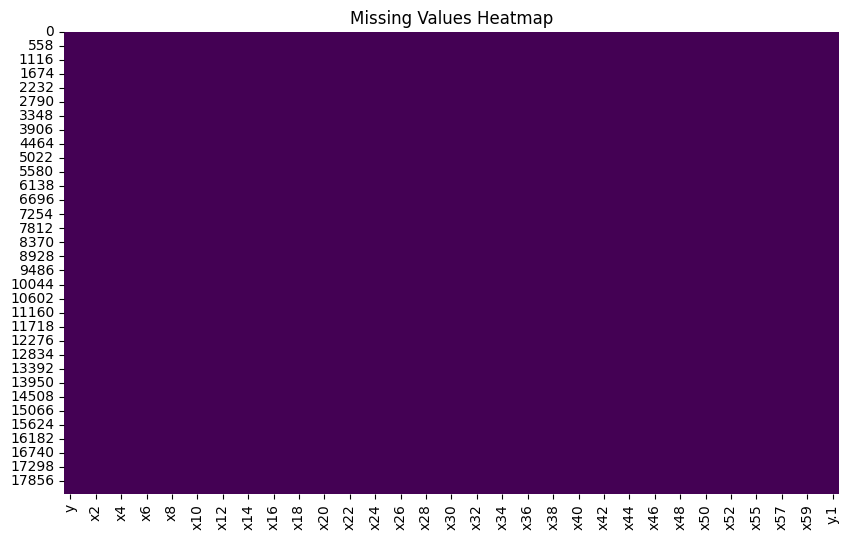

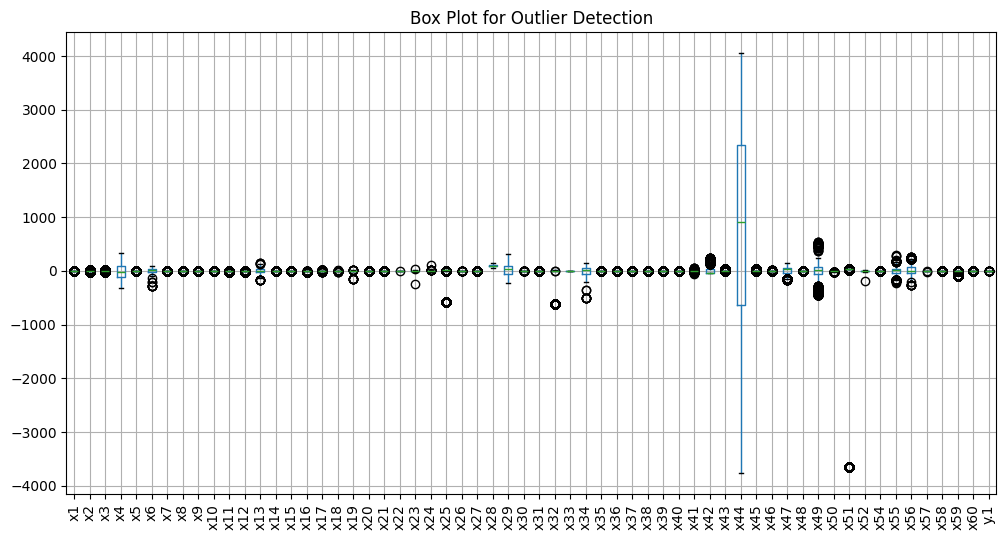

File 'C:\Users\mbpd1\downloads\upgrad\capstone\anom\data\processed\preprocessed_data.csv' already exists. Overwriting...
Preprocessed data saved to C:\Users\mbpd1\downloads\upgrad\capstone\anom\data\processed\preprocessed_data.csv
Building new features...
Dropping columns with NaN or Infinity values: []
Dropping columns with NaN or Infinity values: []
Original dataset shape: (18398, 73), (18398,)
Resampled dataset shape: (36548, 73), (36548,)
Feature-engineered data saved to C:\Users\mbpd1\downloads\upgrad\capstone\anom\data\processed\X_features_resampled.csv
Resampled target data saved to C:\Users\mbpd1\downloads\upgrad\capstone\anom\data\processed\y_resampled.csv
Performing EDA...
Perform EDA and preprocessing on the dataset.
Performing Univariate Analysis...
Performing Bivariate Analysis...
Generating Correlation Heatmap...


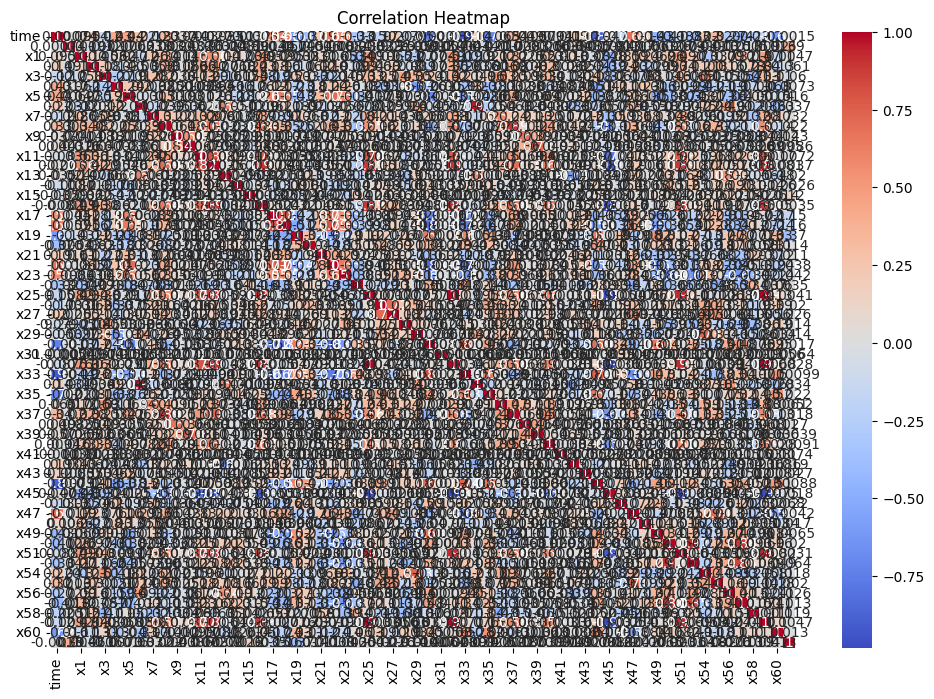

Cleaned data saved to C:\Users\mbpd1\downloads\upgrad\capstone\anom\data\processed
Training the model...
Dropping columns with NaN or Infinity values: []
Dropping columns with NaN or Infinity values: []
Original dataset shape: (18398, 73), (18398,)
Resampled dataset shape: (36548, 73), (36548,)
Feature-engineered data saved to C:\Users\mbpd1\downloads\upgrad\capstone\anom\data\processed\X_features_resampled.csv
Resampled target data saved to C:\Users\mbpd1\downloads\upgrad\capstone\anom\data\processed\y_resampled.csv
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Training Accuracy: 1.0000
Test Accuracy: 0.9998
Accuracy Gap (Overfitting check): 0.0002
No significant overfitting detected.
Best Model Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Model Accuracy: 0.9998
F1-Score: 0.9998
Recall: 1.0000
Precision: 0.9996

Classification Report:
              precision    recall  f1

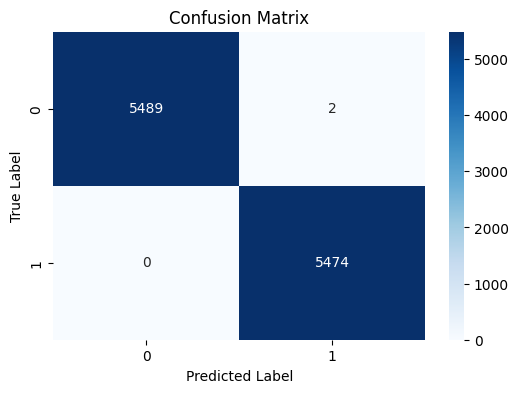

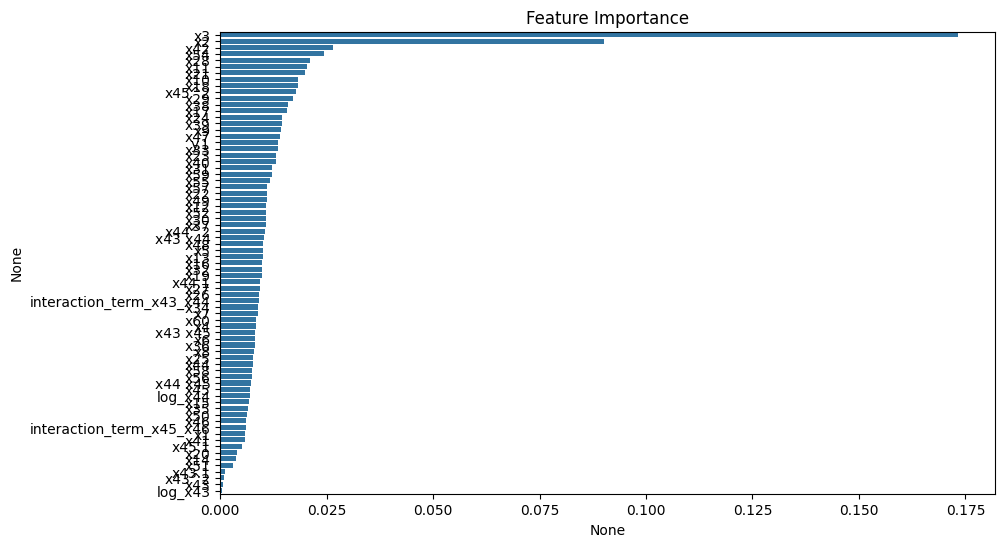

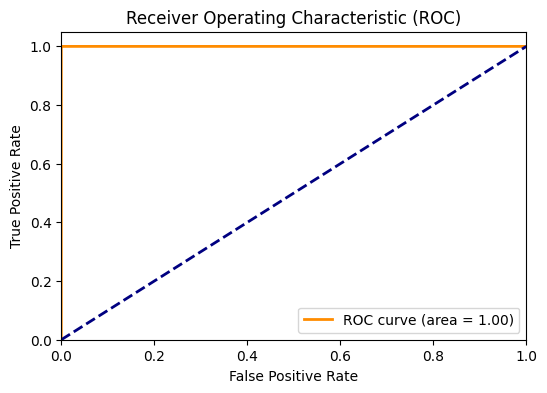

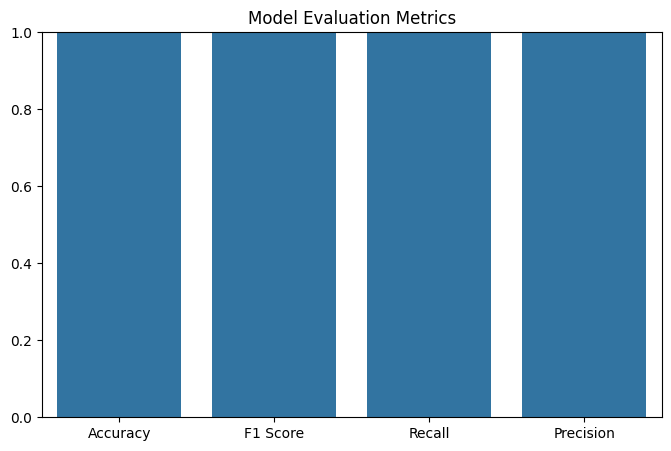

Saving the model to C:/Users/mbpd1/Downloads/upgrad/capstone/Anom/models/best_random_forest_model.pkl...
Best model saved at C:/Users/mbpd1/Downloads/upgrad/capstone/Anom/models/best_random_forest_model.pkl
Model results saved at C:/Users/mbpd1/Downloads/upgrad/capstone/Anom/models/model_results.txt


In [1]:
import sys
import os
import joblib
import pandas as pd

# Add the directory containing train_model.py and other modules to the system path
sys.path.append(r'C:/Users/mbpd1/Downloads/upgrad/capstone/Anom/src/models/')
sys.path.append(r'C:/Users/mbpd1/Downloads/upgrad/capstone/Anom/src/features')
sys.path.append(r'C:/Users/mbpd1/Downloads/upgrad/capstone/Anom/src/data/')

# Import necessary functions from the respective scripts
from train_model import load_feature_engineered_data, train_model
from build_features import load_preprocessed_data, build_features
from load_data import perform_eda, preprocess_data

# Define paths for saving models and results
model_save_path = r'C:/Users/mbpd1/Downloads/upgrad/capstone/Anom/models/best_random_forest_model.pkl'
model_results_path = r'C:/Users/mbpd1/Downloads/upgrad/capstone/Anom/models/model_results.txt'

def main():
    # Step 1: Load data from Excel file
    print("Loading preprocessed data...")
    data_path = r'C:\Users\mbpd1\downloads\upgrad\capstone\anom\data\raw\AnomaData.xlsx'
    
    # Load the data into a DataFrame
    data = pd.read_excel(data_path)
    
    # Preprocess the data
    X_scaled, y, preprocessed_data = preprocess_data(data)

    print("Building new features...")
    X_featured, y_featured = build_features(X_scaled, y)

    # Step 2: Perform EDA on the preprocessed data
    print("Performing EDA...")
    perform_eda(data_path)

    # Step 3: Train the model
    print("Training the model...")
    X_scaled, y = load_preprocessed_data()
    X, y = load_feature_engineered_data()
    model = train_model(X, y)
    
    # Step 4: Save the trained model
    print(f"Saving the model to {model_save_path}...")
    joblib.dump(model, model_save_path)

    # Optionally save model results, evaluation, etc.
    with open(model_results_path, 'w') as f:
        f.write("Model training completed successfully.\n")
    
    print(f"Best model saved at {model_save_path}")
    print(f"Model results saved at {model_results_path}")

if __name__ == "__main__":
    main()